In [41]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [12]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [24]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results = []
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)==6).all()

In [25]:
# 2. Convert the June temperatures to a list.
temps = list(np.ravel(results))

In [33]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
df = pd.DataFrame(results, columns=['date','June temps'])
df.set_index(df['date'], inplace=True)
print(df)

                  date  June temps
date                              
2010-06-01  2010-06-01        78.0
2010-06-02  2010-06-02        76.0
2010-06-03  2010-06-03        78.0
2010-06-04  2010-06-04        76.0
2010-06-05  2010-06-05        77.0
...                ...         ...
2017-06-26  2017-06-26        79.0
2017-06-27  2017-06-27        74.0
2017-06-28  2017-06-28        74.0
2017-06-29  2017-06-29        76.0
2017-06-30  2017-06-30        75.0

[1700 rows x 2 columns]


In [34]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
df.describe()

,June temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


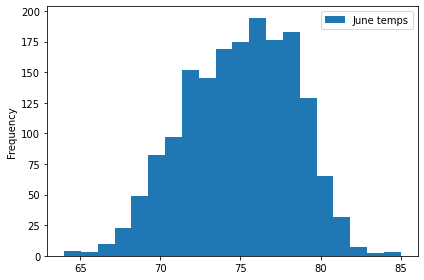

In [42]:
df.plot.hist(bins=20)
plt.tight_layout()

In [45]:
results_pcrp = session.query(Measurement.date, Measurement.prcp).filter(extract('month',Measurement.date)==6).all()
df_june_pcrp = pd.DataFrame(results_pcrp, columns=['date','June pcrp'])
df_june_pcrp.set_index(df_june_pcrp['date'], inplace=True)
df_june_pcrp.describe()

,June pcrp
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [ ]:
# 5. Return to your challenge instructions to compare your summary statistics

## D2: Determine the Summary Statistics for December

In [28]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results_dec = []
results_dec = session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)==12).all()

In [9]:
# 7. Convert the December temperatures to a list.
temps_dec = list(np.ravel(results))

In [31]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df_dec = pd.DataFrame(results_dec, columns=['date','December temps'])
df_dec.set_index(df_dec['date'], inplace=True)
print(df_dec)

                  date  December temps
date                                  
2010-12-01  2010-12-01            76.0
2010-12-03  2010-12-03            74.0
2010-12-04  2010-12-04            74.0
2010-12-06  2010-12-06            64.0
2010-12-07  2010-12-07            64.0
...                ...             ...
2016-12-27  2016-12-27            71.0
2016-12-28  2016-12-28            71.0
2016-12-29  2016-12-29            69.0
2016-12-30  2016-12-30            65.0
2016-12-31  2016-12-31            65.0

[1517 rows x 2 columns]


In [32]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df_dec.describe()

,December temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


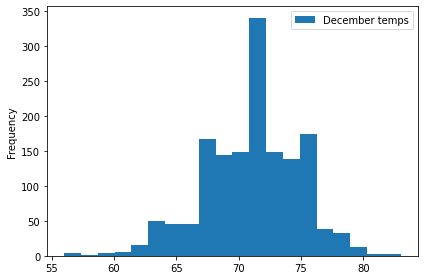

In [43]:
df_dec.plot.hist(bins=20)
plt.tight_layout()

In [46]:
results_dec_pcrp = session.query(Measurement.date, Measurement.prcp).filter(extract('month',Measurement.date)==12).all()
df_dec_pcrp = pd.DataFrame(results_dec_pcrp, columns=['date','December pcrp'])
df_dec_pcrp.set_index(df_dec_pcrp['date'], inplace=True)
df_dec_pcrp.describe()

,December pcrp
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [ ]:
# 10. Return to your challenge instructions to compare your summary statistics